## Testando base final

In [5]:
import pandas as pd
import nltk.corpus
import re
import string
import spacy

In [6]:
df = pd.read_csv('pre-processed.csv',sep=';')
df = df[['preprocessed_news','label']]
df = df.dropna()
df['label'] = df['label'].astype(int)
df

,preprocessed_news,label
0,katia abreu diz vai colocar expulsao moldura n...,0
1,ray peita bolsonaro conservador fake entrevist...,0
2,reinaldo azevedo desmascarado policia federal ...,0
3,relatorio assustador bndes mostra dinheiro pub...,0
4,radialista americano fala sobre pt vendem ilus...,0
...,...,...
7196,jornal britanico acao contra lula lava jato se...,1
7197,temer diz acionou pf cade investigar aumentos ...,1
7198,obstaculos politicos temer especialistas ouvid...,1
7199,setembro boa noite aqui estao principais notic...,1


In [7]:
nlp = spacy.load('pt_core_news_sm')

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

In [8]:
df['preprocessed_news'] = df['preprocessed_news'].apply(lemmatize_text)

In [9]:
base = df.rename(columns={'preprocessed_news': 'Noticia'})
base

,Noticia,label
0,katia abrer dizer ir colocar expulsao moldura ...,0
1,Ray peito bolsonaro conservador Fake Entrevist...,0
2,reinaldo azevedo desmascarar policia federal f...,0
3,relatorio assustador bnde mostrar dinheiro pub...,0
4,radialista americano falar sobre pt vender ilu...,0
...,...,...
7196,jornal britanico acao contra Lula lava jato se...,1
7197,temer dizer acionar pf cade investigar aumento...,1
7198,obstaculo politico temer especialista ouvir av...,1
7199,setembro bom noite aqui estao principal notici...,1


## TREINAMENTO - Utilizando Bag of Words

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [11]:
X = base['Noticia']  # Coluna com o texto das notícias
y = base['label']  # Coluna com os rótulos (0 para falsa, 1 para verdadeira)


# Vetorização dos recursos usando TF-IDF
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
models = [
    MultinomialNB(),
    SVC(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

    # Cálculo da matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print("Matriz de Confusão:")
    print(confusion)
    print()

Modelo: MultinomialNB
Acurácia: 0.8263888888888888
Precisão: 0.760485651214128
Recall: 0.9542936288088643
F1-score: 0.8464373464373464

Matriz de Confusão:
[[501 217]
 [ 33 689]]

Modelo: SVC
Acurácia: 0.95625
Precisão: 0.9608391608391609
Recall: 0.9515235457063712
F1-score: 0.9561586638830898

Matriz de Confusão:
[[690  28]
 [ 35 687]]

Modelo: KNeighborsClassifier
Acurácia: 0.7020833333333333
Precisão: 1.0
Recall: 0.40581717451523547
F1-score: 0.5773399014778325

Matriz de Confusão:
[[718   0]
 [429 293]]

Modelo: GradientBoostingClassifier
Acurácia: 0.9444444444444444
Precisão: 0.9433701657458563
Recall: 0.945983379501385
F1-score: 0.9446749654218533

Matriz de Confusão:
[[677  41]
 [ 39 683]]



In [18]:
models = [
    #MultinomialNB(),
    #SVC(),
    #KNeighborsClassifier(),
    #GradientBoostingClassifier(),

    LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier(),
    XGBClassifier()
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

    # Cálculo da matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print("Matriz de Confusão:")
    print(confusion)
    print()

Modelo: LogisticRegression
Acurácia: 0.9465277777777777
Precisão: 0.9587482219061166
Recall: 0.9335180055401662
F1-score: 0.9459649122807017

Matriz de Confusão:
[[689  29]
 [ 48 674]]

Modelo: RandomForestClassifier
Acurácia: 0.9458333333333333
Precisão: 0.9666666666666667
Recall: 0.9238227146814404
F1-score: 0.9447592067988669

Matriz de Confusão:
[[695  23]
 [ 55 667]]

Modelo: MLPClassifier
Acurácia: 0.9513888888888888
Precisão: 0.9393530997304582
Recall: 0.9653739612188366
F1-score: 0.9521857923497268

Matriz de Confusão:
[[673  45]
 [ 25 697]]

Modelo: XGBClassifier
Acurácia: 0.9465277777777777
Precisão: 0.9317269076305221
Recall: 0.96398891966759
F1-score: 0.9475833900612661

Matriz de Confusão:
[[667  51]
 [ 26 696]]



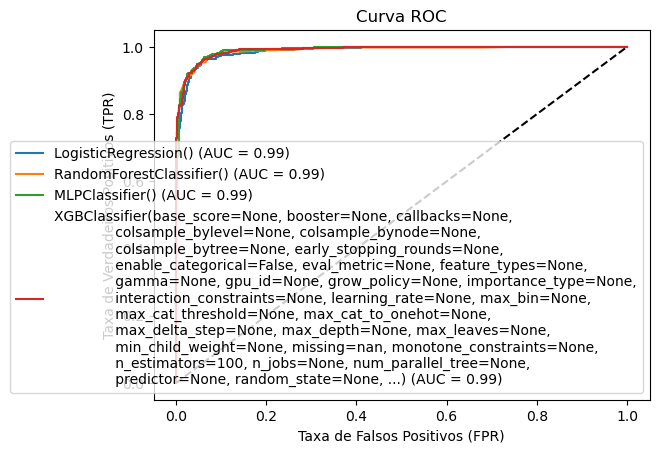

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

for model in models:
    model.fit(X_train, y_train)
    
    # Verificar se o modelo suporta cálculo de probabilidade
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model, auc))
    else:
        # Se o modelo não suportar cálculo de probabilidade, use a função de decisão para calcular as pontuações
        y_scores = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model, auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

MultinomialNB()


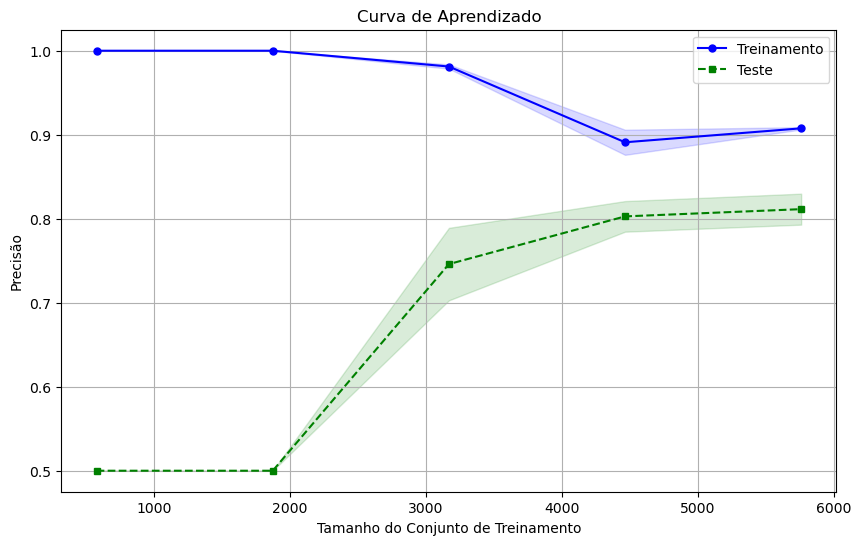

SVC()


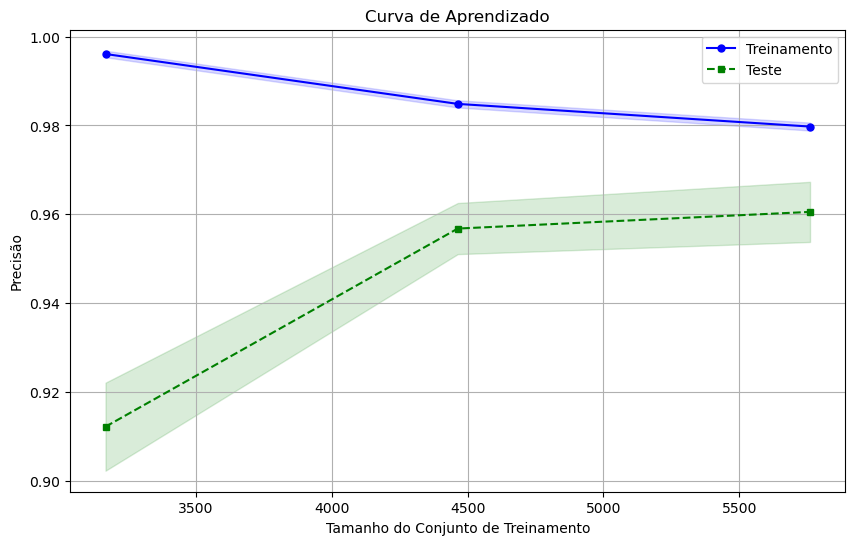

KNeighborsClassifier()


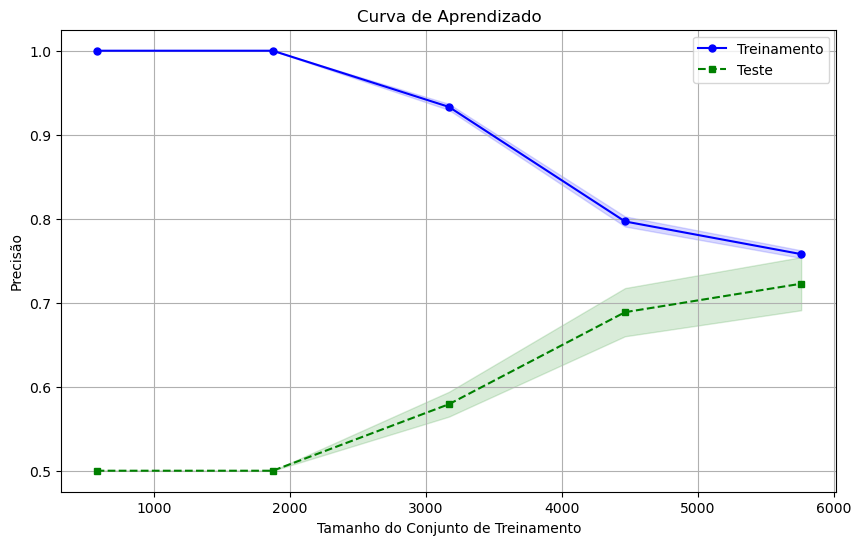

GradientBoostingClassifier()


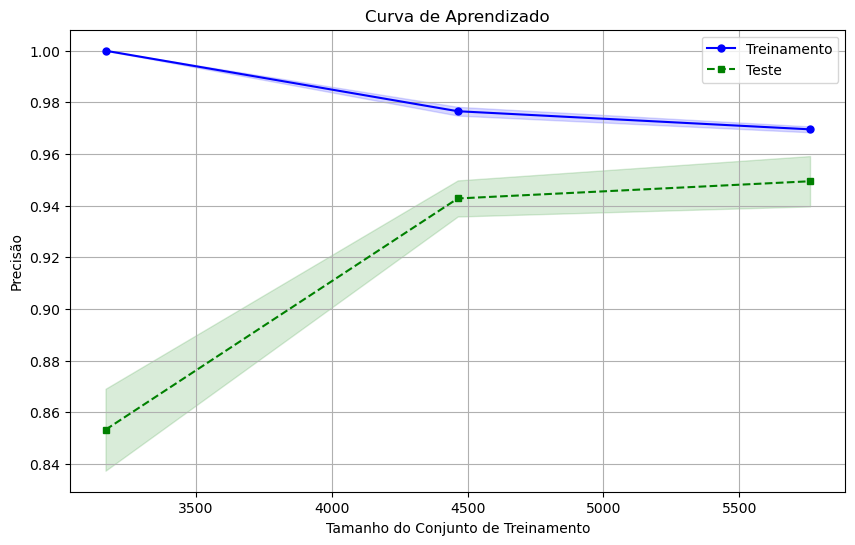

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Média e desvio padrão dos scores de treinamento e teste
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plotagem da curva de aprendizado
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Treinamento')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Teste')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    print(model)
    plt.title('Curva de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Precisão')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Plotar curvas de aprendizado para cada modelo
for model in models:
    plot_learning_curve(model, X, y)

## TESTANDO NOTÍCIAS FALSAS

In [21]:
df = pd.read_excel('FakeRecogna.xlsx')
df = df[['Noticia','Classe']]
df = df.dropna()
df['Classe'] = df['Classe'].astype(int)
df 


,Noticia,Classe
0,apagão vaticano papar presar acusação tráfico ...,0
1,o governar equador anunciar preparar cova cole...,1
2,o companhia air france operar voar direto pequ...,1
3,o marfrig global foods retomar vender carnar b...,1
4,o assunto voltar o compartilhar rede social ju...,0
...,...,...
11898,argentino marcar tendência mundial vacinar o c...,0
11899,o ministrar saudar marcelo queiroga e represen...,1
11900,o vídeo recentemente publicar página “ 18:18 ”...,0
11901,parir afp o frança impor tocar recolher o 20h ...,1


In [22]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [23]:
stopwords_br = nltk.corpus.stopwords.words('portuguese')
#stopwords_br

In [24]:
df['Noticia'] = df['Noticia'].apply(wordopt)
df['Noticia'] = df['Noticia'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_br]))
df

,Noticia,Classe
0,apagão vaticano papar presar acusação tráfico ...,0
1,governar equador anunciar preparar cova coleti...,1
2,companhia air france operar voar direto pequim...,1
3,marfrig global foods retomar vender carnar bov...,1
4,assunto voltar compartilhar rede social julho ...,0
...,...,...
11898,argentino marcar tendência mundial vacinar car...,0
11899,ministrar saudar marcelo queiroga representant...,1
11900,vídeo recentemente publicar página facebook ar...,0
11901,parir afp frança impor tocar recolher locar en...,1


In [25]:
df2 = df[df['Classe']== 0]
df2

,Noticia,Classe
0,apagão vaticano papar presar acusação tráfico ...,0
4,assunto voltar compartilhar rede social julho ...,0
5,durante santo missar policiar obedecer ordem p...,0
7,cadastramento programar render brasil crédito ...,0
9,reação vacinar entender facilidade pessoa infe...,0
...,...,...
11896,comer fonte usuário compartilhar artigo datar ...,0
11897,urgente papar propor brasil criação patria dis...,0
11898,argentino marcar tendência mundial vacinar car...,0
11900,vídeo recentemente publicar página facebook ar...,0


In [26]:
df2 = df2.rename(columns={'Classe':'label'})
df2

,Noticia,label
0,apagão vaticano papar presar acusação tráfico ...,0
4,assunto voltar compartilhar rede social julho ...,0
5,durante santo missar policiar obedecer ordem p...,0
7,cadastramento programar render brasil crédito ...,0
9,reação vacinar entender facilidade pessoa infe...,0
...,...,...
11896,comer fonte usuário compartilhar artigo datar ...,0
11897,urgente papar propor brasil criação patria dis...,0
11898,argentino marcar tendência mundial vacinar car...,0
11900,vídeo recentemente publicar página facebook ar...,0


In [27]:
def manual_testing2(model,news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)

    nlp = spacy.load('pt_core_news_sm')
    doc = nlp(new_def_test["text"].iloc[0])
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    new_x_test = [lemmatized_text]
    
    #new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_LR = model.predict(new_xv_test)
    #pred_NB = NB.predict(new_xv_test)
   

    return pred_LR

In [28]:
for model in models:
    
    print(model)
    fake = 0
    true = 0

    for i in df2['Noticia']:
        x = manual_testing2(model,i)
        if x == 0:
            #print('Fake News')
            fake += 1
        else:
            #print('Not a Fake News')
            true += 1

    print('Fake: ',fake)
    print('True: ',true)

LogisticRegression()
Fake:  5947
True:  4
RandomForestClassifier()
Fake:  5951
True:  0
MLPClassifier()
Fake:  5799
True:  152
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Fake:  5946
True:  5


## Testando notícias verdadeiras

In [29]:
df3 = df[df['Classe']==1]
df3

,Noticia,Classe
1,governar equador anunciar preparar cova coleti...,1
2,companhia air france operar voar direto pequim...,1
3,marfrig global foods retomar vender carnar bov...,1
6,greve pagamento aluguel organizar sindicato in...,1
8,imaginar livrar passar ano guardar estante fol...,1
...,...,...
11889,vereador eduardo suplicy pt reeleito vereador ...,1
11890,proporção morte covid europa idoso ano cair in...,1
11892,papar francisco retomar audiência público quar...,1
11899,ministrar saudar marcelo queiroga representant...,1


In [30]:
df3 = df3.rename(columns={'Classe':'label'})
df3

,Noticia,label
1,governar equador anunciar preparar cova coleti...,1
2,companhia air france operar voar direto pequim...,1
3,marfrig global foods retomar vender carnar bov...,1
6,greve pagamento aluguel organizar sindicato in...,1
8,imaginar livrar passar ano guardar estante fol...,1
...,...,...
11889,vereador eduardo suplicy pt reeleito vereador ...,1
11890,proporção morte covid europa idoso ano cair in...,1
11892,papar francisco retomar audiência público quar...,1
11899,ministrar saudar marcelo queiroga representant...,1


In [31]:
for model in models:
    
    print(model)
    fake = 0
    true = 0

    for i in df3['Noticia']:
        x = manual_testing2(model,i)
        if x == 0:
            #print('Fake News')
            fake += 1
        else:
            #print('Not a Fake News')
            true += 1

    print('Fake: ',fake)
    print('True: ',true)

LogisticRegression()


Fake:  5867
True:  84
RandomForestClassifier()
Fake:  5941
True:  10
MLPClassifier()
Fake:  4889
True:  1062
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Fake:  5851
True:  100


## Treinamento TD-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = base['Noticia']  # Coluna com o texto das notícias
y = base['label']  # Coluna com os rótulos (0 para falsa, 1 para verdadeira)

# Vetorização dos recursos usando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
models = [
    MultinomialNB(),
    SVC(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),

    LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier(),
    XGBClassifier()
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

    # Cálculo da matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print("Matriz de Confusão:")
    print(confusion)
    print()

Modelo: MultinomialNB
Acurácia: 0.6
Precisão: 0.5563271604938271
Recall: 0.9986149584487535
F1-score: 0.7145688800792863

Matriz de Confusão:
[[143 575]
 [  1 721]]

Modelo: SVC
Acurácia: 0.9548611111111112
Precisão: 0.9659574468085106
Recall: 0.943213296398892
F1-score: 0.9544498948843727

Matriz de Confusão:
[[694  24]
 [ 41 681]]

Modelo: KNeighborsClassifier
Acurácia: 0.6888888888888889
Precisão: 0.6252285191956124
Recall: 0.9473684210526315
F1-score: 0.7533039647577091

Matriz de Confusão:
[[308 410]
 [ 38 684]]

Modelo: GradientBoostingClassifier
Acurácia: 0.9444444444444444
Precisão: 0.9337837837837838
Recall: 0.9570637119113573
F1-score: 0.945280437756498

Matriz de Confusão:
[[669  49]
 [ 31 691]]

Modelo: LogisticRegression
Acurácia: 0.9465277777777777
Precisão: 0.9587482219061166
Recall: 0.9335180055401662
F1-score: 0.9459649122807017

Matriz de Confusão:
[[689  29]
 [ 48 674]]

Modelo: RandomForestClassifier
Acurácia: 0.9451388888888889
Precisão: 0.9679767103347889
Recall: 

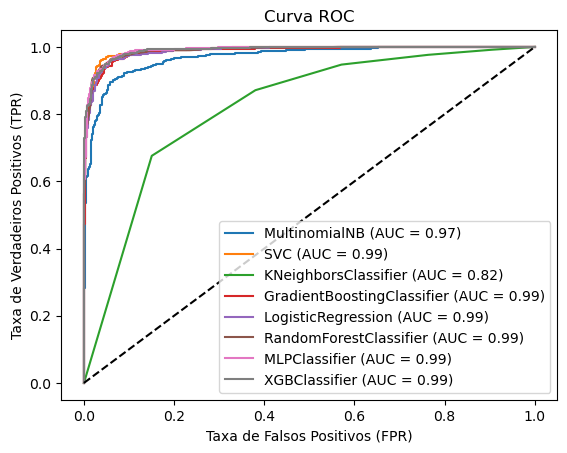

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

for model in models:
    model.fit(X_train, y_train)
    
    # Verificar se o modelo suporta cálculo de probabilidade
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))
    else:
        # Se o modelo não suportar cálculo de probabilidade, use a função de decisão para calcular as pontuações
        y_scores = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

MultinomialNB()


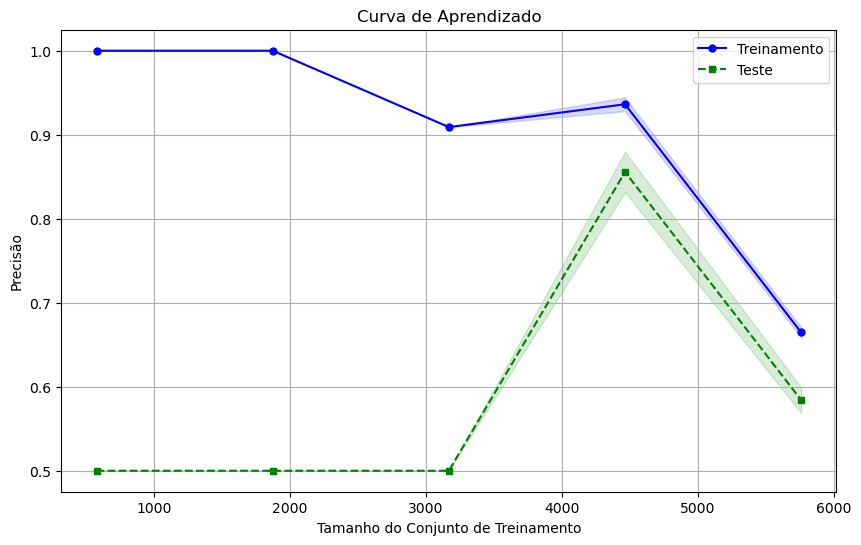

SVC()


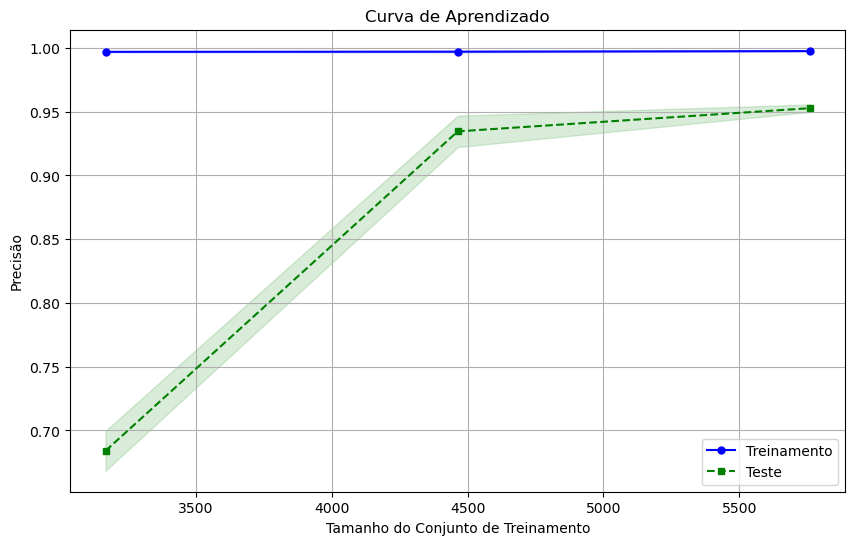

KNeighborsClassifier()


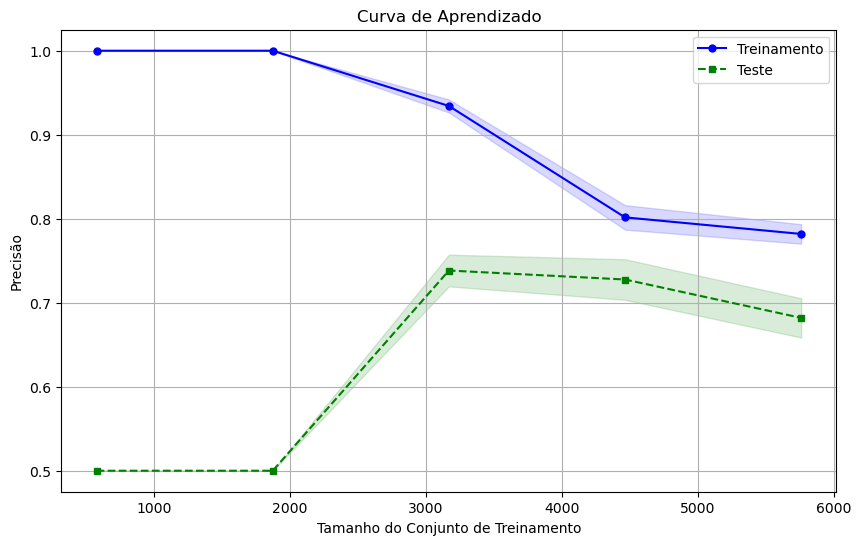

GradientBoostingClassifier()


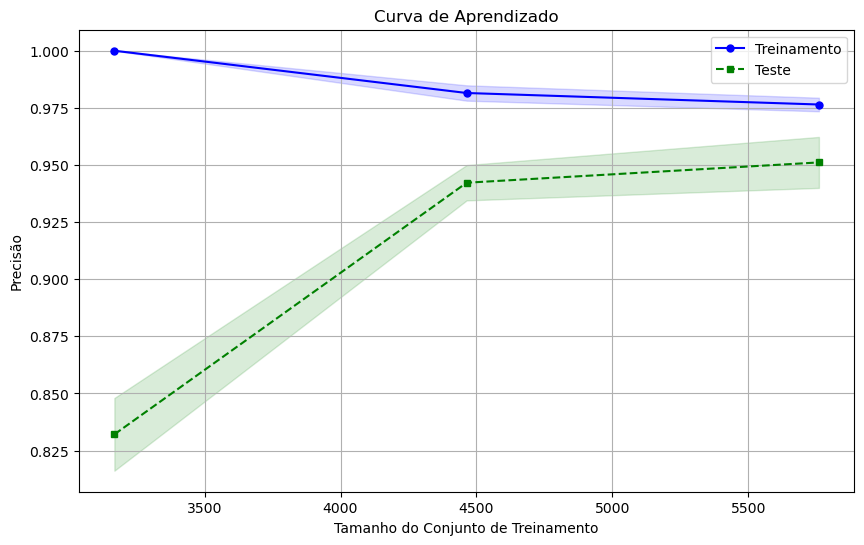

LogisticRegression()


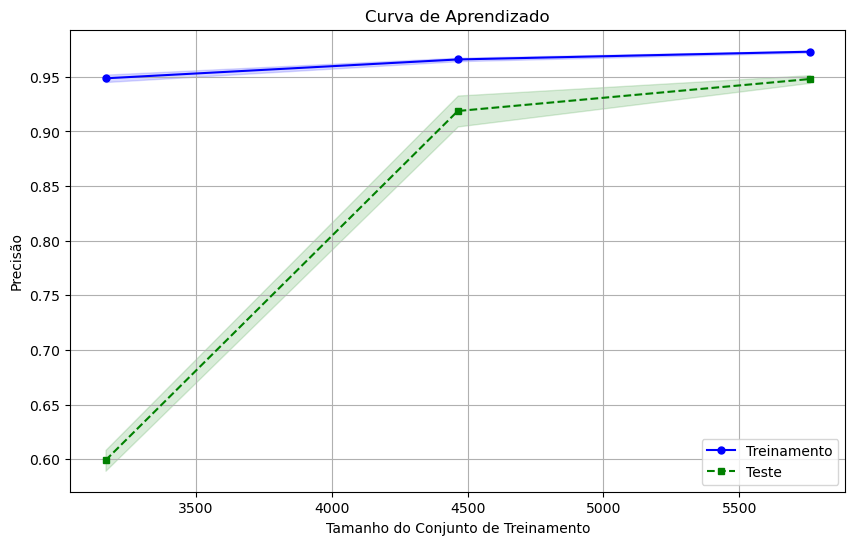

RandomForestClassifier()


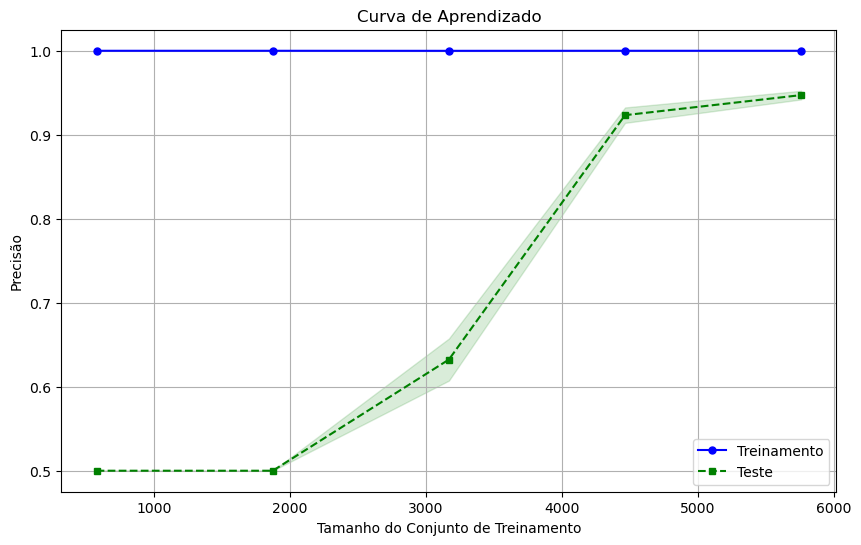

MLPClassifier()


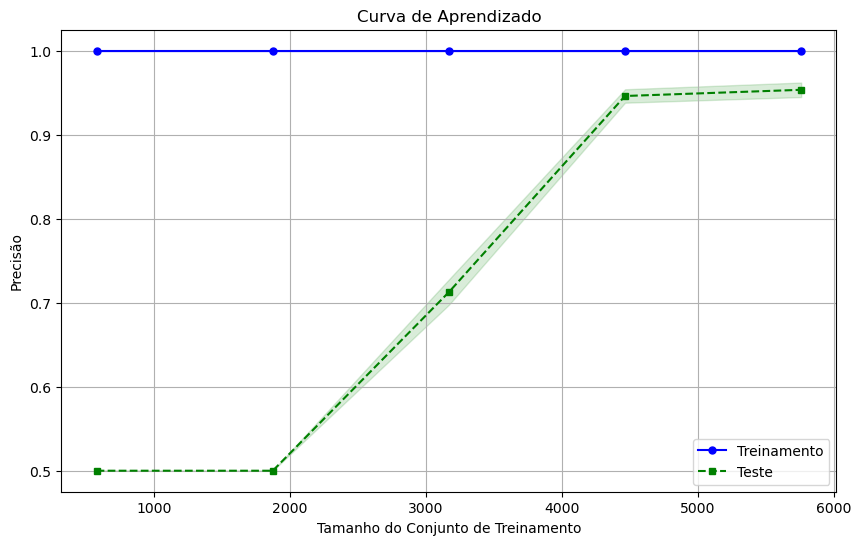

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


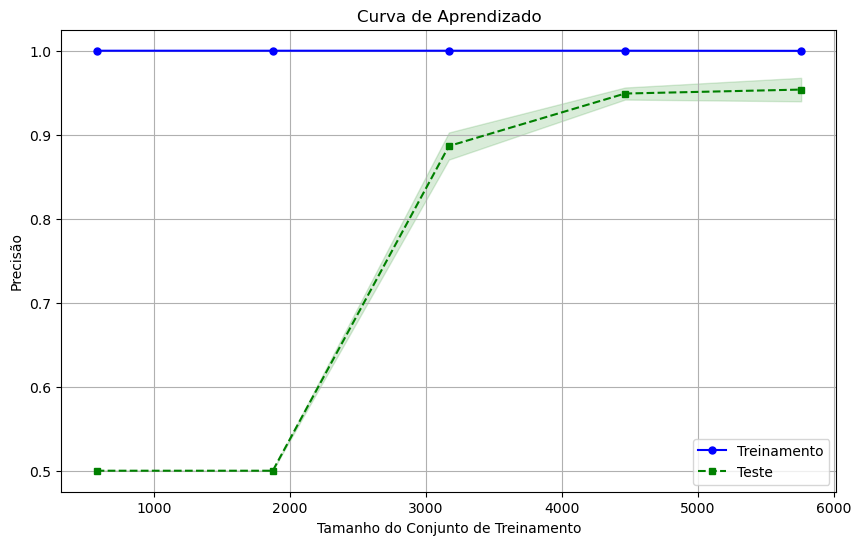

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Média e desvio padrão dos scores de treinamento e teste
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plotagem da curva de aprendizado
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Treinamento')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Teste')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    print(model)
    plt.title('Curva de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Precisão')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Plotar curvas de aprendizado para cada modelo
for model in models:
    plot_learning_curve(model, X, y)

In [34]:
models = [
    MultinomialNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

    # Cálculo da matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print("Matriz de Confusão:")
    print(confusion)
    print()

Modelo: MultinomialNB
Acurácia: 0.6
Precisão: 0.5563271604938271
Recall: 0.9986149584487535
F1-score: 0.7145688800792863

Modelo: KNeighborsClassifier
Acurácia: 0.6888888888888889
Precisão: 0.6252285191956124
Recall: 0.9473684210526315
F1-score: 0.7533039647577091

Modelo: GradientBoostingClassifier
Acurácia: 0.9444444444444444
Precisão: 0.9337837837837838
Recall: 0.9570637119113573
F1-score: 0.945280437756498

Modelo: LogisticRegression
Acurácia: 0.9465277777777777
Precisão: 0.9587482219061166
Recall: 0.9335180055401662
F1-score: 0.9459649122807017



In [33]:
models = [
    #MultinomialNB(),
    SVC(),
    #KNeighborsClassifier(),
    #GradientBoostingClassifier(),

    #LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier(),
    XGBClassifier()
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

    # Cálculo da matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print("Matriz de Confusão:")
    print(confusion)
    print()

Modelo: SVC
Acurácia: 0.9548611111111112
Precisão: 0.9659574468085106
Recall: 0.943213296398892
F1-score: 0.9544498948843727

Matriz de Confusão:
[[694  24]
 [ 41 681]]

Modelo: RandomForestClassifier
Acurácia: 0.9479166666666666
Precisão: 0.9722627737226277
Recall: 0.9224376731301939
F1-score: 0.9466950959488273

Matriz de Confusão:
[[699  19]
 [ 56 666]]

Modelo: MLPClassifier
Acurácia: 0.9506944444444444
Precisão: 0.9380888290713324
Recall: 0.9653739612188366
F1-score: 0.9515358361774743

Matriz de Confusão:
[[672  46]
 [ 25 697]]

Modelo: XGBClassifier
Acurácia: 0.9465277777777777
Precisão: 0.9317269076305221
Recall: 0.96398891966759
F1-score: 0.9475833900612661

Matriz de Confusão:
[[667  51]
 [ 26 696]]



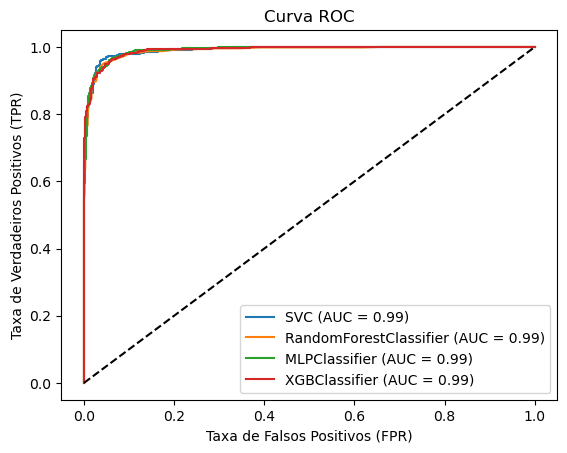

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

for model in models:
    model.fit(X_train, y_train)
    
    # Verificar se o modelo suporta cálculo de probabilidade
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))
    else:
        # Se o modelo não suportar cálculo de probabilidade, use a função de decisão para calcular as pontuações
        y_scores = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## FALSA

In [35]:
for model in models:
    
    print(model)
    fake = 0
    true = 0

    for i in df2['Noticia']:
        x = manual_testing2(model,i)
        if x == 0:
            #print('Fake News')
            fake += 1
        else:
            #print('Not a Fake News')
            true += 1

    print('Fake: ',fake)
    print('True: ',true)

SVC()
Fake:  5951
True:  0
RandomForestClassifier()
Fake:  5951
True:  0
MLPClassifier()
Fake:  5773
True:  178
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Fake:  5946
True:  5


# VERDADEIRA

In [36]:
for model in models:
    
    print(model)
    fake = 0
    true = 0

    for i in df3['Noticia']:
        x = manual_testing2(model,i)
        if x == 0:
            #print('Fake News')
            fake += 1
        else:
            #print('Not a Fake News')
            true += 1

    print('Fake: ',fake)
    print('True: ',true)

SVC()
Fake:  5863
True:  88
RandomForestClassifier()
Fake:  5942
True:  9
MLPClassifier()
Fake:  4826
True:  1125
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Fake:  5851
True:  100
